In [122]:
import pandas as pd

In [123]:
region = "viet-bac"  # dong-bang

In [124]:
basePath = f"/home/phuonglh/code/s2s/bin/{region}/clusterC/"

In [125]:
path1 = f"{basePath}/1-0.tsv"
path2 = f"{basePath}/2-0.tsv"

In [126]:
df1 = pd.read_csv(path1, header=None, delimiter='\t')
df2 = pd.read_csv(path2, header=None, delimiter='\t')
df1.columns = ["estimate", "real"]
df2.columns = ["estimate", "real"]

In [127]:
df1

,estimate,real
0,1.802692,1.040909
1,1.669005,2.559091
2,1.379367,8.540909
3,1.509685,0.018182
4,1.764106,0.013636
...,...,...
1449,2.064477,0.886364
1450,1.583410,2.463636
1451,1.513247,2.372727
1452,1.611259,0.027273


In [128]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precipitation')

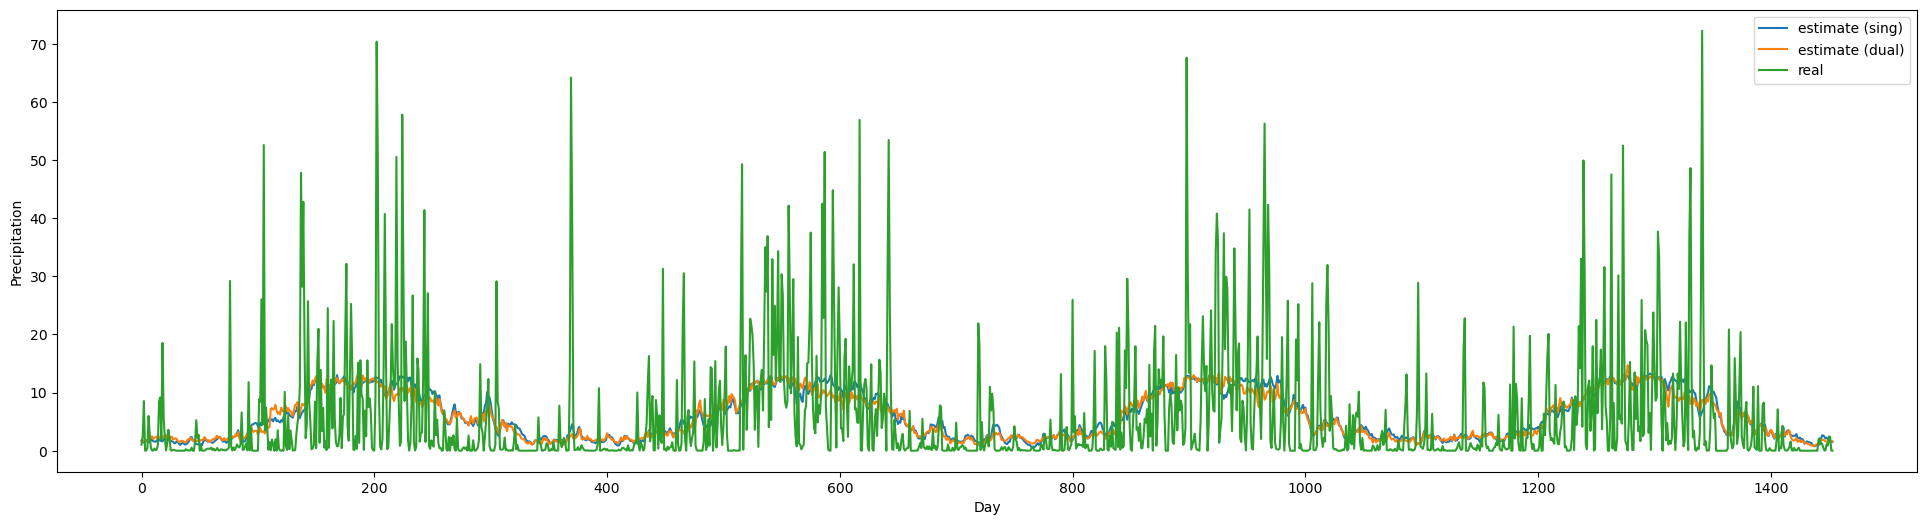

In [129]:
plt.figure(figsize=(24,6))
plt.plot(df1["estimate"])
plt.plot(df2["estimate"])
plt.plot(df1["real"])
plt.legend(["estimate (sing)", "estimate (dual)", "real"])
plt.xlabel('Day')
plt.ylabel('Precipitation')


In [130]:
def isExtreme(value):
    if value >= 0.9:
        return 1
    else:
        return 0

In [131]:
df1Rank = df1['real'].rank(pct=True)

In [132]:
df1Rank

0       0.506190
1       0.616575
2       0.780605
3       0.159216
4       0.144085
          ...   
1449    0.488308
1450    0.612105
1451    0.607978
1452    0.182256
1453    0.144085
Name: real, Length: 1454, dtype: float64

In [133]:
y = df1Rank.apply(lambda v: isExtreme(v))

In [134]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1449    0
1450    0
1451    0
1452    0
1453    0
Name: real, Length: 1454, dtype: int64

In [135]:
df1['label'] = y

In [136]:
sum(y)

146

In [137]:
r1 = df1['estimate'].rank(pct=True)
y1 = r1.apply(lambda v: isExtreme(v))

In [138]:
r2 = df2['estimate'].rank(pct=True)
y2 = r2.apply(lambda v: isExtreme(v))

In [139]:
import sklearn
import sklearn.metrics

In [140]:
print(sklearn.metrics.classification_report(y, y1))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1308
           1       0.25      0.25      0.25       146

    accuracy                           0.85      1454
   macro avg       0.58      0.58      0.58      1454
weighted avg       0.85      0.85      0.85      1454



In [141]:
print(sklearn.metrics.classification_report(y, y2))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1308
           1       0.25      0.25      0.25       146

    accuracy                           0.85      1454
   macro avg       0.59      0.59      0.59      1454
weighted avg       0.85      0.85      0.85      1454

